In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

%matplotlib inline 
plt.style.use('fivethirtyeight')

### Create two samples

In [2]:
x1 = np.random.normal(10,1,100)
x2 = np.random.normal(9.5,2,80)

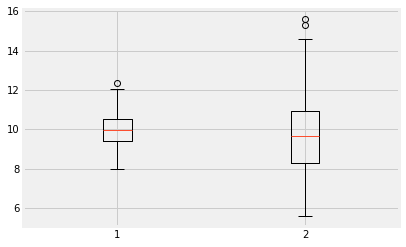

In [3]:
plt.boxplot([x1,x2])
plt.show()

### Let's calculate the t-statistic and p-value with scipy

In [4]:
t_stat, p_value = stats.ttest_ind(x1,x2)
print('t-statistic={}, p-value={}'.format(t_stat, p_value))

t-statistic=1.24421179538, p-value=0.215057506768


### Let's calculate the t-statistic by hand
Let's use the formula for the Independent t-test:
http://www.sthda.com/english/wiki/t-test-formula

In [5]:
# first let's calculate s2
s2 = (sum(np.square(x1-np.mean(x1))) + sum(np.square(x2-np.mean(x2)))) / (len(x1) + len(x2) -2)
s2

2.6283737231980053

In [6]:
t = (np.mean(x1) - np.mean(x2)) / (np.sqrt(s2*((1./len(x1)) + (1./len(x2)))))
print('t-statistic: {}'.format(t))

t-statistic: 1.24421179538


Good, the t-statistic we calculated is the same we got from scipy!

### Let's calculate the p-value by hand
We have to check the t-statistic we calculated against the t-distribution.

In [7]:
# degrees of freedom (this is a parameter of the t-statistics)
df = len(x1) + len(x2) - 2
df

178

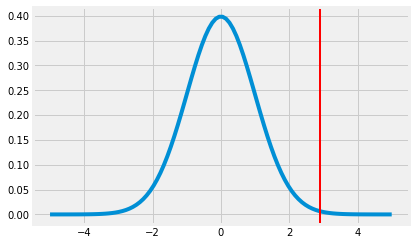

In [8]:
# let's draw the t-distribution
x = np.linspace(-5,5,100)
y = stats.t.pdf(x, df=df)

plt.plot(x,y) # this is the distribution
plt.axvline(t,c='red', lw=2) #this is out t-statistics

plt.show()

We need to calculate the are on the right divided by all the area to get a percentage.  
Wait...this is exactly what the CDF (cumulative distribution function) if for!

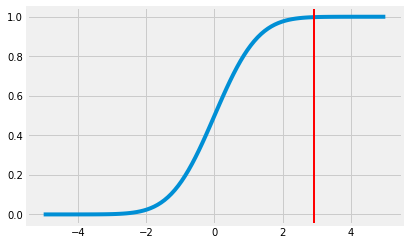

In [9]:
# CDF
y = stats.t.cdf(x, df=df)

plt.plot(x,y)
plt.axvline(t,c='red', lw=2)

plt.show()

What is the y value corresponding to our t-statistics?

In [11]:
print(stats.t.cdf(t, df=df))

0.9979451934072376


We need to find the opposite = the remaining part to get to 1 (or to 100%)

In [12]:
print(1 - stats.t.cdf(t, df=df))

0.0020548065927623593


This is half of the p-value we got from scipy!  
We need to multiply it by 2 because it's a two tailed test!

In [13]:
print('p-value: {}'.format(2*(1 - stats.t.cdf(t, df=df))))

p-value: 0.00410961318552
